In [56]:
##importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##Loading dataset
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#Analysing the insights

<Figure size 1000x1000 with 0 Axes>

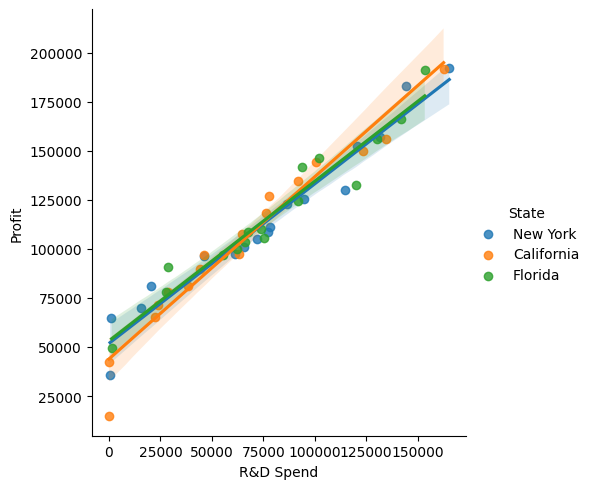

In [57]:
plt.figure(figsize=(10,10))
sns.lmplot(x='R&D Spend', y='Profit', data=df, hue='State')
plt.savefig('R&D Spend vs Profit.png')

###Inference - As the R&D spend is more the profit for the start-ups also increases.

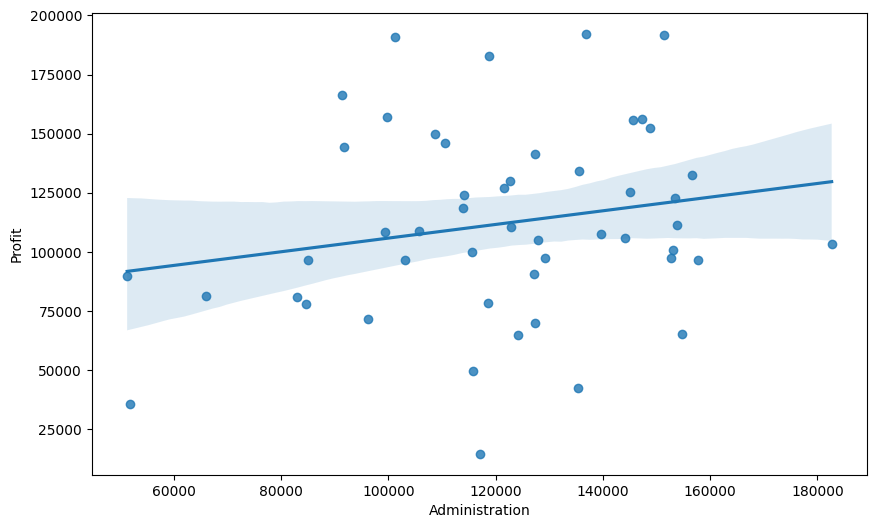

In [58]:
plt.figure(figsize=(10,6))
sns.regplot(x='Administration', y='Profit', data=df)
plt.savefig('Administration vs Profit.png')

###Inference - We can see that when the strength of Administration ranges from 120000 to 160000 there can be seen more profit in start-ups.

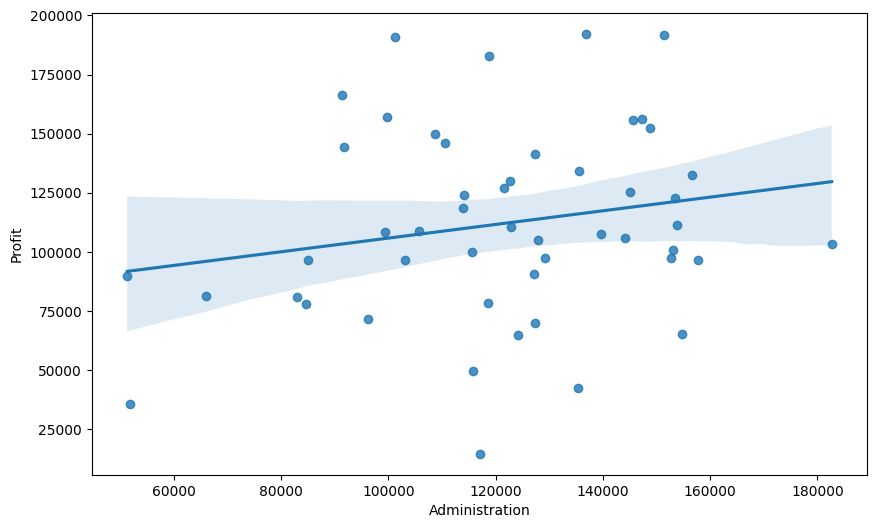

In [59]:
plt.figure(figsize=(10,6))
sns.regplot(x='Administration', y='Profit', data=df)
plt.savefig('Administration vs Profit.png')

###Inference - We can see that when the marketing spent is more the profit of the start-up also increases.

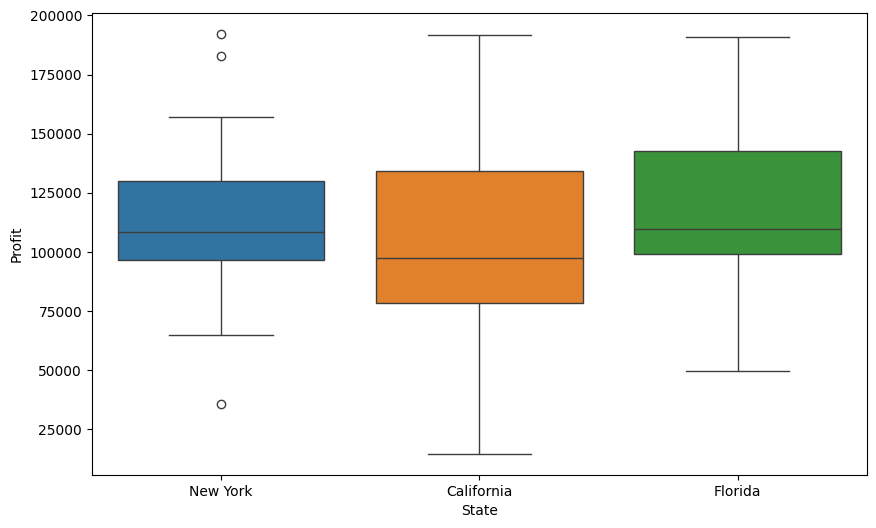

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x='State', y='Profit', data=df, hue='State')
plt.savefig('State vs Profit.png')

###Inference - We can see that the highest and the lowest profit to the start-ups belong to the California state.

In [13]:
##EDA and model Selection
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [14]:
##Splitting the data using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape

((40, 3), (40,))

In [16]:
X_test.shape, y_test.shape

((10, 3), (10,))

In [40]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
model

LinearRegression()

In [41]:
##predicting the outcomes
pred = model.predict(X_test)
pred

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [42]:
df_pred = pd.DataFrame(pred, columns=['Predicted Profit'])

In [43]:
df_pred['Actual Profit'] = y_test.values

In [44]:
df_pred

,Predicted Profit,Actual Profit
0,126703.027165,134307.35
1,84894.750816,81005.76
2,98893.418160,99937.59
3,46501.708150,64926.08
4,129128.397344,125370.37
5,50992.694863,35673.41
6,109016.553658,105733.54
7,100878.464145,107404.34
8,97700.596386,97427.84
9,113106.152922,122776.86


In [50]:
###Checking the accuracy using regression model betwen the trainig and the testing model
print('Training Accuracy: ', model.score(X_train, y_train))
print('Testing Accuracy: ', model.score(X_test, y_test))

Training Accuracy:  0.9535927757257411
Testing Accuracy:  0.9000653083037321


In [51]:
###Using Ridge to correct the underfitting data
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
ridge_model

Ridge()

In [52]:
X_ridge_pred = ridge.predict(X_test)

In [54]:
###Checking the accuracy using Ridge model betwen the trainig and the testing model
print('Training Accuracy: ', ridge_model.score(X_train, y_train))
print('Testing Accuracy: ', ridge_model.score(X_test, y_test))

Training Accuracy:  0.9535927757257411
Testing Accuracy:  0.9000653083028223


In [55]:
###Hence the result is same. Therefore, it is a generalized data

In [61]:
##Saving the ridge trained model using joblib
joblib.dump(ridge_model, 'ridge_model.pkl')

['ridge_model.pkl']